## Hacker Statistics:

More oftent than not, we have sample measured data, for which we can easily get the numerical statistics, 
however, if we measure the data again for the same process under consideration, we mayn't get the same mean/median.
Hence, we need probability to come up with an interval rather than fixed statistics.

> to draw probailistic conclusions about what we might expect if we collected the same data again

> , OR the prcoess by which we go from measured data to probabiliistic conclusion


Instead of repeating the process of measuring data, Use simulations to compute probability

## Coin Flip:
    
Function `np.random.random()` = draws a number between 0 & 1 with equal probabiliity. 
If `number < .5`, consider heads else tails

>Experiment which has two options True/False, called Bernaulli trial, and is best approximated by Binomial distribution

# Simulating 4 coin flips:

In [31]:
import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4) # provide 4 random numbers b/w 0 and 1 with equal probability
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [36]:
heads = random_numbers <.5
np.sum(heads) # in numerical context, python treats 1 as True and 0 as False,  so you can sum it up.
#number of heads when flipped a coin 4 times

1

# What is the probability of getting 4 heads when tossing a coin 4 times. 

In [35]:

# simulate coin flip 1000's of times to approximate the probabiliity

#HHHH = (1/16)

all_heads =0
for _ in range(10000):
    heads = np.random.random(size=4) <.5
    n_heads =np.sum(heads)
    if n_heads ==4:
        all_heads = all_heads+1

all_heads/10000

0.062

# In essence,
Hacker statistics is about thinking:
   > How to simulate your data
   > simulate many many times


# The np.random module and Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability `p` of landing heads (success) and probability `1−p` of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

In [42]:
# since it is a biased coin, `p` can't be fixed and has to be parameterised. if np.random.random < p, then heads else tails

def perform_bernoulli_trials(n, p):
    n_successess = 0
    for i in range(n): # since we need to measure probability, we need to simulate the data (say 10000's) of times
        x= np.random.random()
        if x <p: # if x is less than p; p=.5 in case of unbiased coin, and p is not equal to .5, in case of biased coin
            n_successess = n_successess+1
    return n_successess #will give total flips, for probability divide this metric by n
        



In [46]:
perform_bernoulli_trials(100,.5)

46

## How many defaults might we expect?
Let's say a bank made `100` mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

> Please note over here, we're going from measured data to probabilistic conclusion. We know that out of 100 loans, 5 would default, but how would the overall probability distribution looks like so that area under the curve is 1

/Users/hjaggi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


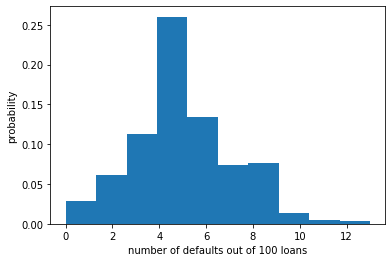

In [50]:
import matplotlib.pyplot as plt
n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i]= perform_bernoulli_trials(100, .05)

_ = plt.hist(n_defaults, normed  =True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
_ = plt.show()

# Discrete Uniform PMF
> Discrete Uniform PMF:set of probabilities of discrete outcome
The outcome of rolling a single fair die is:
Discrete
Uniformly distributed

# Binomial Distribution:

> The number `r` of successes in Bernaulli trials with probability `p`of success is binomially distributed


In [55]:
np.random.binomial(4, .5, size =10)

# how many heads we're getting when a coin is flipped n times with p(heads) =.5
# Probability distribution of successes when we flip a coin.

array([4, 0, 2, 2, 3, 2, 3, 3, 2, 2])

# Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

(array([ 389.,  753., 3158., 1860., 2516.,  695.,  516.,   73.,   34.,
           6.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

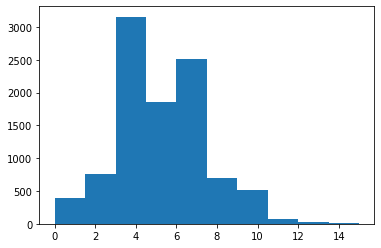

In [63]:
n_defaults = np.empty(10000)
n_defaults = np.random.binomial(100,.05,size =10000)

import matplotlib.pyplot as plt
plt.hist(n_defaults)

# Poisson Process and distribution
   > The timing of the next event is completely independent of when the previous event happened
   
   > In rare event, when p is low and n is high for bernaulli trials, the distribution can be thought of as Poisson 
   distribution 
   
   > Poisson distribution has only one parameter - the mean number (n*p) of successes per time interval
   
 Examples
 - Natural birth in hospital
 - Website clicks
 
Poisson distribution is the limit of the Binomial distribution for low  probability of success and large number of trials - rare events

In [64]:
np.random.poisson (6,size =10000)

array([ 6, 10,  5, ...,  7,  5,  6])

# Relationship between Binomial and Poisson distributions
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is the Poisson story, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to `np` approximates a Binomial distribution for `n` Bernoulli trials with probability `p` of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters `n` and `p` such that `np=10`.

In [65]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson =np.random.poisson(10, size =10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

Poisson:      10.0305 3.1612924176671795


In [67]:
# Specify values of n and p to consider for Binomial: n, p

# Specify values of n and p to consider for Binomial: n, p

n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


n = 20 Binom: 9.995 2.2146275081828097
n = 100 Binom: 10.0857 3.0228059001530347
n = 1000 Binom: 10.0205 3.1281431792678545


# Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [69]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115,size = 10000) 

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large  = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

# the probability is .007, that is it is not that improbable to see 7 or more no hitter season in the country

Probability of seven or more no-hitters: 0.0061


# Probability Density Functions

Till now, we have focussed on discrete probability function, what if the targetted measure is continuous, then the probabilty of set of values is defined by PDF.

Hence, PDF is

    - continuous analog to PMF
    - Mathematiical description of relative likelihood of observing a value of a continuous variable
    - Area under the curve provides Probability

# Normal Distribution 

> Parameterised by 2 parameters - mean and standard deviation of a PARAMETER

`np.random.normal(mean, std dev, size)`

# Exponential Distriibution:
    > The waiting time between arrivals of a Poisson process is exponentially distributed
    > The Exponential distribution describes the waiting times between rare events.
    
   `np.random.exponential(mean, size)`